# Day 1 - Afternoon

# Introduction to Machine Learning

<img src="./img/house-prices.png" width="50%">

*Image generated using ChatGPT 4*

So the topic of this course is of course Machine Learning, and more spefically practical or applied Machine Learning. So now we will discuss in general what Machine Learning actually is.

So what is machine learning? One definition states:

> *Machine learning is the field of study that gives computers the ability to learn without being explicitly programmed.*

*Arthur Samuel, 1959*

Arthur Samuel wrote a very early programme to learn to play the game of Checkers. The algorithm was designed to make random moves, and slowly learn which moves led to an advantage and which led to a disadvantage. It was designed to play against itself, and did so many 10s of thousands of times, eventually learning what good moves were and what bad moves were and to avoid them, and managed to learn to play Checkers to a top level: without being programmed to do this. This is a special type of Machine Learning method called Reinforcement Learning, and was one of the very first Machine Learning systems. It is used in many fields still today, including the system that beat the Go champion, AlphaGo. The basic premise, however, is that a computer can be made to learns from some data.

More formally however, you can think of a machine learning algorithm as something whereby a system takes an input, $X$ which is our data, and produces an output $y$, which is our prediction. In other words, it learns a mapping.

In **supervised learning**, we give our algorithm examples of input and output pairs: ($X$, $y$) pairs. Therefore, the algorithm will see input data and the correct 'answer' for this input data, and given enough of these pairs, should learn the mapping from input $X$ it output $y$. It should eventually learn that when given a new sample $X$, then it will give a very good prediction for $y$.

The algorithm learns from these input/label pairs ($X$, $y$) and eventually will be able to predict the output based on some new input where you have no labelled data. This is known as **supervised machine learning**, as you provide the algorithm with your data and the correct answers. We will primarily be dealing with supervised machine learning in this course, as it is by far the most used type of machine learning.

## Sub-Categories of Machine Learning

### Supervised vs. Unsupervised Learning

The first thing to note, is that machine learning is broken down in to a few sub-categories. The first major distinctions is the distinction between **supervised machine learning** and **unsupervised machine learning**. In supervised machine learning we train on data where we have examples of our data with the corresponding answers (or **labels**, as they are called), as we just discussed. Unsupervised learning deals with the training of algorithms where we have inout data, but we **do not have any labels or answers** for this data. 

In this course, we are going to be dealing exclusively with supervised learning, as it by far the most common type of machine learning problem.

### Classification and Regression

Within the area of supervised learning, there are also two major branches: regression and classification. 

Regression deals with predicting some continuous value. For example a price of a house, or a temperature.  

Classification deals with predicting a category like spam/not spam in the case of a spam filter, or malignant/benign in some medical application. There are other subcategories of classification, such as binary classification, where there are two possible prediction categories, or multi-class classification, where there can be many different prediction categories. Tomorrow we will train a neural network to predict an image class from a possible 1,000 classes.

The distinction is important for choosing the method you wish to use to train a prediction algorithm. Not all algorithms can do both regression and classification for example, but many can. For example neural networks can be trained as regression algorithms or classification algorithms. $k$-Nearest Neighbors ($k$-NN), however, is a algorithm for classification that assigns a label to an input data point based on the majority class of its $k$ nearest neighbors, and cannot be used for regression problems, by virtue of its design.

## Examples of Machine Learning Applications

Let's just think about what are possible machine learning algorithms (remember we are focussing on supervised learning): 

| Input ($X$)         | Output ($y$)              | Application         |
|---------------------|---------------------------|---------------------|
| email               | spam (0/1)                | Spam filter         |
| hand written digits | label (0, 1, ..., 9)      | Image recognition   |
| english             | german                    | Machine translation |
| house details       | house price (numerical)   | Regression          |

Notes:

- In the case of the email/spam example: this is known as a binary classification problem
- In the case of the hand written image example: this is a multi-class classification problem
- In the case of the house details: this is a regression problem, the output is a real number, the price of the house

In all of these examples, in a supervised learning setting, you will train your algorithm with input $X$ and the correct answers, $y$. For example, for the spam filter, you will want to supply it with examples of emails and whether or not it is a spam email or not. With enough of these examples, the algorithm will begin to learn what types of emails are spam and which are genuine.

Once a machine learning algorithm has been trained for spam filtering, you can then supply it with a new email (one it has never seen before), and it will try to predict the label (spam/not spam) based on this email's contents.

We should also note at this point, is that applied machine learning is very much an engineering discipline. In other words, given a particular dataset, with a stated goal, there is a best pratice set of decisions that can be made about how to tackle the problem. And there are a lot of decisions that need to be made. Do we select logistic regression or a support vector machine. Do we need more data. Do we need to train longer. Are we *over-fitting* or are we *under-fitting*. All these decisions can be made in a systematic way based on the situation. The goal of this course is to remove as much of the guesswork as possible, and for you to be able to make informed decisions about how to tackle a particular machine learning problem.

# Terminology and Conventions

Before we go any further, let's cover some basic terminology and we will also cover some conventions we will use for writing our code. 

Let us define the following terms:

- **Features**: these are properties about the sample in question. In a house dataset, this would be square metres, does it have a pool, neighbourhood, etc.
- **Labels** or **targets** or **classes**: this is what you are trying to predict. They are also what you need to supply an algorithm in a supervised setting, during training. In the house price dataset, this is the price of the house.
- **Training data**: what we use to train our algorithm.
- **Test data**: what we use to test our algorithm. This is normally a subset of your training data that you set aside in order to test your algorithm.

## Coding Conventions

By convention your training data is stored in `X`, uppercase and your label data is stored in `y`, lowercase. 

Also, if you are splitting our data into training and test sets, you will see the following `X_train`, `X_test` will contain our training data, and `y_train`, and `y_test` will contain our corresponding labels. 

We will explain later exactly what the purpose of the training and test set data are.

## Linear Regression

The first concrete, actual algorithm we will look at is called linear regression and is probably the simplest machine learning algorithm you will encounter.

So, imagine the following scenario from one of the examples above - you have a dataset of house prices and area in square metres. 

In [1]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Specify the number of samples
num_samples = 100

# Generate 100 random areas in square meters (from 50 to 250) 
areas = np.random.uniform(50, 250, num_samples)

# Generate house prices with a base price, added by a linear function of area (with some noise)
base_price = 100000  # base price for the smallest house
price_per_sqm = 2000  # price per square meter
noise = np.random.normal(0, 30000, num_samples) # adding some noise to make it more realistic

# Our prices are therefore the base price, plus the area * price per square meter, plus the noise
prices = base_price + areas * price_per_sqm + noise

# Create a DataFrame
data = pd.DataFrame({
    'Area (sqm)': areas,
    'Price': prices
})

data

,Area (sqm),Price
0,159.762701,384570.906347
1,193.037873,513100.541158
2,170.552675,455075.223621
3,158.976637,371865.962610
4,134.730960,414109.485549
...,...,...
95,86.638272,293724.380351
96,167.302587,410502.883999
97,54.021509,187356.525142
98,215.788006,517910.036581


We have saved the data as a Pandas DataFrame, which we saw previously.

To get a better idea of how the data looks, we can plot it. 

We will use Matplotlib, which we will not cover during the course, but you will how it is used quite often.

We will use the `scatter()` from Matplotlib to plot the data:

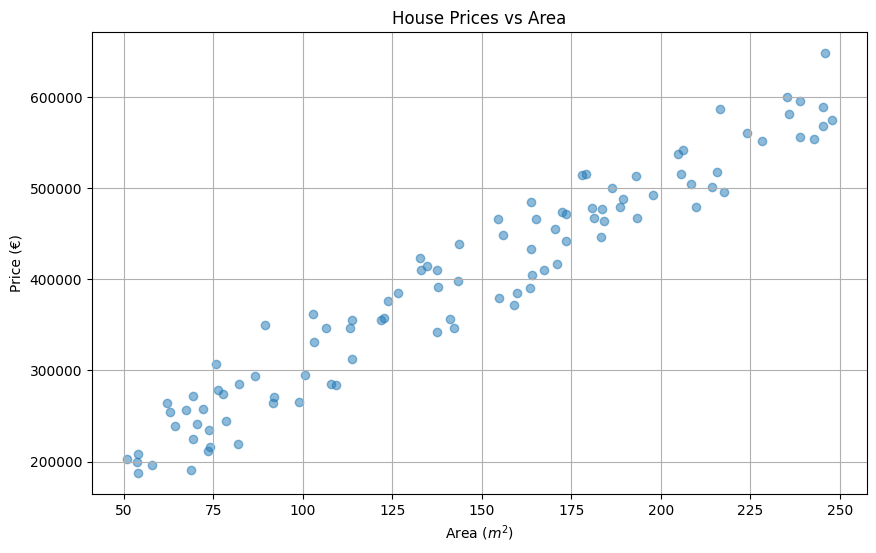

In [2]:
# Plotting the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data['Area (sqm)'], data['Price'], alpha=0.5)
plt.title('House Prices vs Area')
plt.xlabel('Area ($m^2$)')
plt.ylabel('Price (€)')
plt.grid(True)
plt.show()

So what do we see?

We see a more or less linear relationship between the area of the house and the price. 

The bigger the house, the bigger the price! 

The relationship is not perfect, but because there may be many other factors that we are not aware of, such as neighbourhood, or if the house has a pool or not, this is not suprising.

What we will do now is to train a Linear Regression algorithm, which will try to fit a line to this data as well as possible, and try to capture the relationship between area and price.

Do not worry about the details of the code below for now. We will train several algorithms later, line by line. 

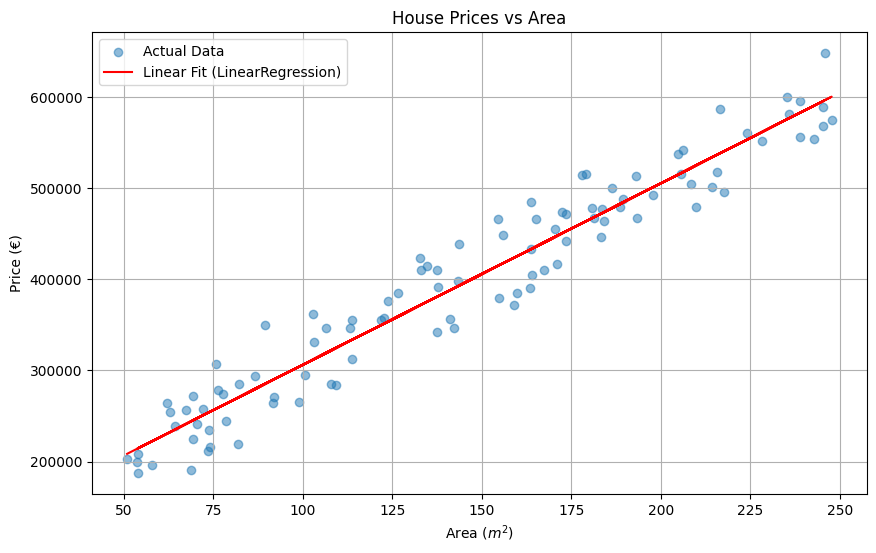

In [3]:
from sklearn.linear_model import LinearRegression

# Reshape data for modeling
X = data['Area (sqm)'].values.reshape(-1, 1)
y = data['Price'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict values for the same input
predictions = model.predict(X)

# Calculate the errors
errors = y - predictions

# Plotting the data and the linear fit
plt.figure(figsize=(10, 6))
plt.scatter(data['Area (sqm)'], data['Price'], alpha=0.5, label='Actual Data')
plt.plot(data['Area (sqm)'], predictions, color='red', label='Linear Fit (LinearRegression)')
plt.title('House Prices vs Area')
plt.xlabel('Area ($m^2$)')
plt.ylabel('Price (€)')
plt.legend()
#for i in range(len(X)):
#    plt.vlines(X[i], min(predictions[i], y[i]), max(predictions[i], y[i]), color='gray', alpha=0.5)
plt.grid(True)
plt.show()

Once this line has been established, or fit to the data, you can use it to predict the prices of new houses. 

If you wanted to sell your house today, and it has 150m2 area, we could predict a selling price of about 400,000 based on the line above.

How is the line actually fit, however? 

Well, this is a supervised algorithm, and therefore the error for any predicted line can be calculated by measuring the difference between the prediction, based on the line, and the actual price. 

This is done by measuring the distance between the line and the true value, and is called a residual.

The line is moved around until the sum of the errors (residuals) is minimised.

We can plot these residuals easily enough:

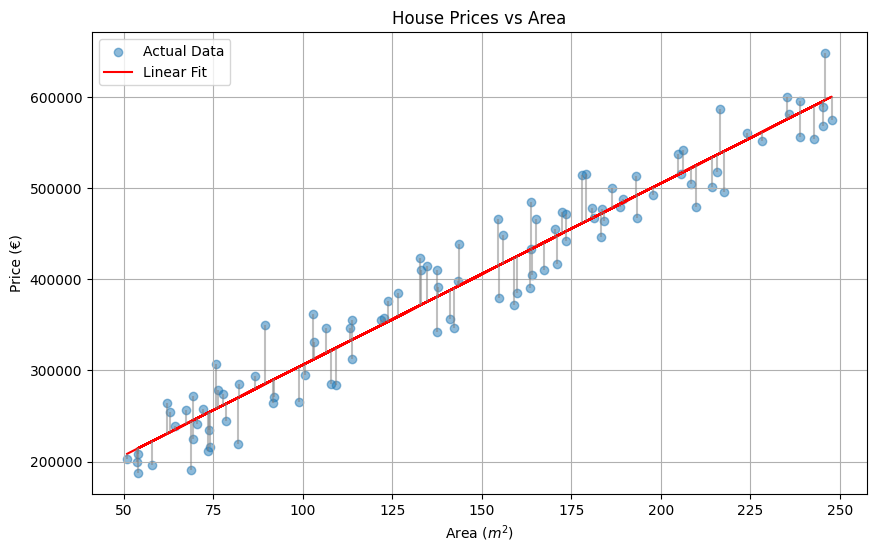

In [4]:
# Plotting the data and the linear fit
plt.figure(figsize=(10, 6))
plt.scatter(data['Area (sqm)'], data['Price'], alpha=0.5, label='Actual Data')
plt.plot(data['Area (sqm)'], predictions, color='red', label='Linear Fit')
plt.title('House Prices vs Area')
plt.xlabel('Area ($m^2$)')
plt.ylabel('Price (€)')
plt.legend()
for i in range(len(X)):
    plt.vlines(X[i], min(predictions[i], y[i]), max(predictions[i], y[i]), color='gray', alpha=0.5)
plt.grid(True)
plt.show()

So the algorithm can get a numerical value for how well a line fits the data, by summing the errors. It then tweaks this line until it minimises this error.  

One such way to get a numerical value for the error is the the mean squared error loss:

$$
MSE = \frac{1}{N}\sum_i^N (y_i - \hat{y}_i)^2
$$

We will not get much more in depth about how algorithms work in this course. However, knowing how a basic algorithm works should help us later when we are dealing with other more complex methods.

## Non-Linear Data

So this is fine for linear data, but what about non-linear data? 

As the name LinearRegression suggests, this algorithm tries to find a linear reltioship in the data.

This might now always be the case of course, so let's generate a not quite linear dataset for the house prices:

   SquareMetres    HousePrice
0     50.000000  14579.878225
1     52.525253  35775.732327
2     55.050505  21964.042376
3     57.575758  54412.966626
4     60.101010  23341.023266


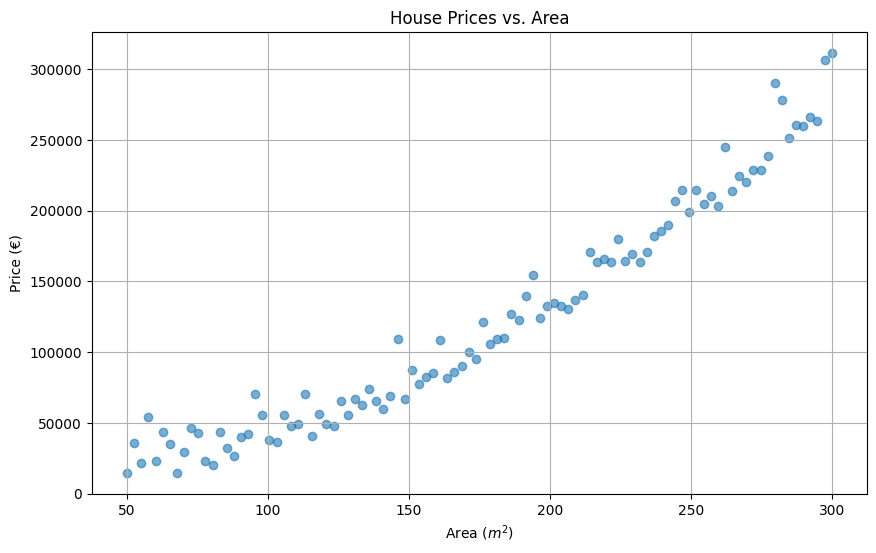

In [5]:
num_samples = 100

# Generate synthetic data
square_metres = np.linspace(50, 300, num_samples) # Area in square metres
noise = np.random.normal(0, 20000, square_metres.shape) # Noise to add some variability
noise = np.absolute(noise)
prices = (square_metres ** 2) * 3 + noise # Non-linear relationship, prices rise quickly as area increases

# Create a DataFrame
data = pd.DataFrame({
    'SquareMetres': square_metres,
    'HousePrice': prices
})

# Show the first few rows of the DataFrame
print(data.head())

# Plot the data to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(data['SquareMetres'], data['HousePrice'], alpha=0.6)
plt.title('House Prices vs. Area')
plt.xlabel('Area ($m^2$)')
plt.ylabel('Price (€)')
plt.grid(True)
plt.show()

Now we can see the relationship is not quite linear, it seems that as area increases, price increases more quickly. 

Of course, we can still fit a straight line to this:

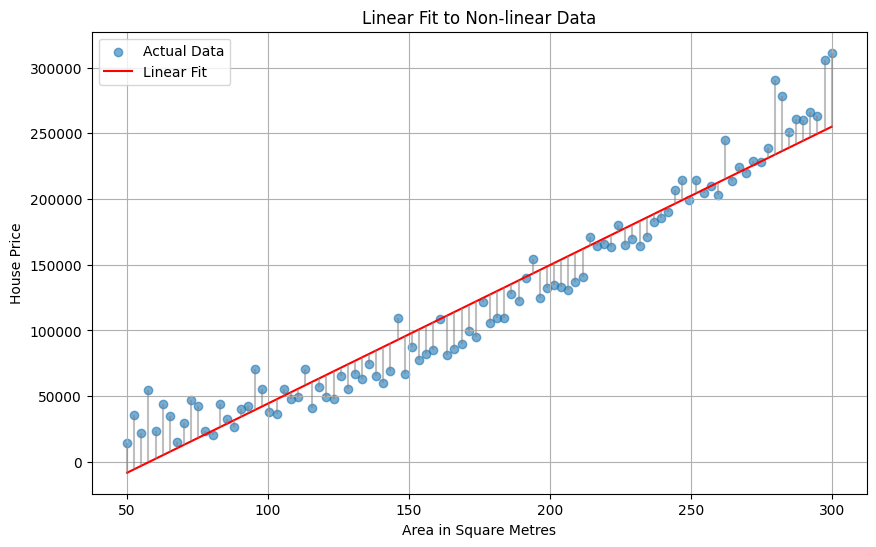

In [6]:
# Reshape the data
X = data['SquareMetres'].values.reshape(-1, 1)
y = data['HousePrice'].values

# Initialize the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

#Errors
errors = y - y_pred

# Plot the data and the linear fit
plt.figure(figsize=(10, 6))
plt.scatter(data['SquareMetres'], data['HousePrice'], alpha=0.6, label='Actual Data')
plt.plot(data['SquareMetres'], y_pred, color='red', label='Linear Fit')
plt.title('Linear Fit to Non-linear Data')
plt.xlabel('Area in Square Metres')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
# Error bars
for i in range(len(X)):
    plt.vlines(X[i], min(y_pred[i], y[i]), max(y_pred[i], y[i]), color='gray', alpha=0.5)
plt.show()

# Model coefficients
intercept, slope = model.intercept_, model.coef_[0]

This does not look bad, however it is difficult to judge visually. What we can do is get a measure for how well the line fit. In this case, we will use the `score()` function which returns the $R^2$ score for the fit.

The LinearRegression model above has been saved as the variable `model` and we can get its score using the `score()` function, which by default is the $R^2$ score. This is a score between 0 and 1, where 1 is a perfect fit to the data.

In [7]:
model.score(X, y)

0.9335273953571135

This score looks quite respectable. Perhaps though we could improve the score with a curve rather than a line, hoping that the curve will fit the data more closely and therefore result in a better score.

So to do this we can now try to fit a polynomial to the data, in other words a non-linear curve:

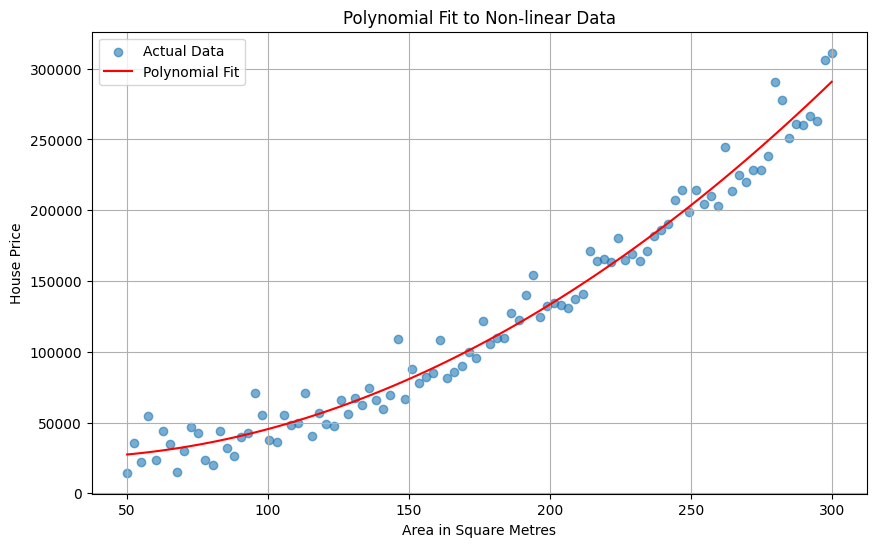

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Set the degree of the polynomial to 2 for quadratic fitting
degree = 2

# Create a pipeline that first transforms the features into polynomial features, then fits a linear model
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
poly_model.fit(X, y)

# Predictions using the polynomial model
y_poly_pred = poly_model.predict(X)

# Errors
errors = y - y_poly_pred

# Plot the data and the polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(data['SquareMetres'], data['HousePrice'], alpha=0.6, label='Actual Data')
plt.plot(data['SquareMetres'], y_poly_pred, color='red', label='Polynomial Fit')
plt.title('Polynomial Fit to Non-linear Data')
plt.xlabel('Area in Square Metres')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()

This looks at first glance to be better. Of course, the best way is to compare the metrics, once again we calculate the $R^2$ score:

In [9]:
poly_model.score(X, y)

0.9765561500422554

This results in an even higher $R^2$ score that our straight line fit. So the curve fit the curved data better than the line!

So the question you might ask is, how do you select the appropriate type of line? 

For example, we could increase the degree of the polynomial above and it may fit the data even better - the degree of the polynomial increases the complexity of the curve, and could fit the data even better. In fact, eventually you could add enough complexity to a curve so that it would fit the data exactly. But is this what we want to do?

So this leads us to the idea of over-fitting and under-fitting, which we will discuss next. 

---
# Over and Underfitting

- What is over/under fitting
- How do we spot it
- How do we prevent it

## What is over/under fitting? 

**Overfitting** occurs when a model learns the training data too well, capturing noise or random fluctuations in the data. All data contains some degree of noise. As a result, an overfitted model performs well on the training data but will perform very poorly when it is applied to new data. This is a classic sign of an overfit model. Overfitting typically happens when a model is too complex, for example a polynomial with a high degree (we will see examples again later). Complex models have a higher capacity to fit data, but they can fit to the noise. A Linear Regression model is not complex enough to overfit to the noise of the datasets that we created above, for example.

**Underfitting** occurs when a model is too simple to capture the underlying structure of the data. In this case, the model **performs poorly both on the training data and on any new data**. Underfitting often happens when the model is too basic or lacks the required complexity to represent the underlying relationships in the data.

Let's plot some examples of overfitting and underfitting.

We will use simulated data and train 3 models. One model will not have the complexity to capture the data't structure and will overfit, another model will fit the data too well, including the data's noise, and will overfit, and one model will fit the data jus

Let's train the models and plot their curves now:t about right.

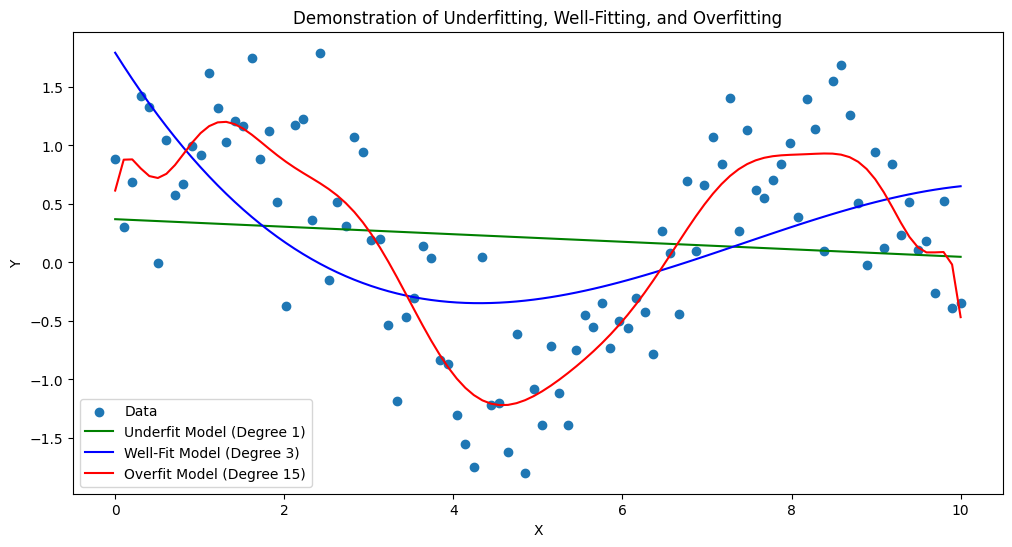

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Creating a dataset with some noise
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(scale=0.5, size=x.shape)

# Underfitting model (Polynomial of degree 1)
underfit_model = np.poly1d(np.polyfit(x, y, 1))

# Well-fitted model (Polynomial of degree 3)
well_fit_model = np.poly1d(np.polyfit(x, y, 3))

# Overfitting model (Polynomial of degree 15)
overfit_model = np.poly1d(np.polyfit(x, y, 15))

# Plotting the data and the models
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, underfit_model(x), label='Underfit Model (Degree 1)', color='green')
plt.plot(x, well_fit_model(x), label='Well-Fit Model (Degree 3)', color='blue')
plt.plot(x, overfit_model(x), label='Overfit Model (Degree 15)', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Demonstration of Underfitting, Well-Fitting, and Overfitting')
plt.show()


We can also plot these are 3 seperate plots, as it might be easier to see:

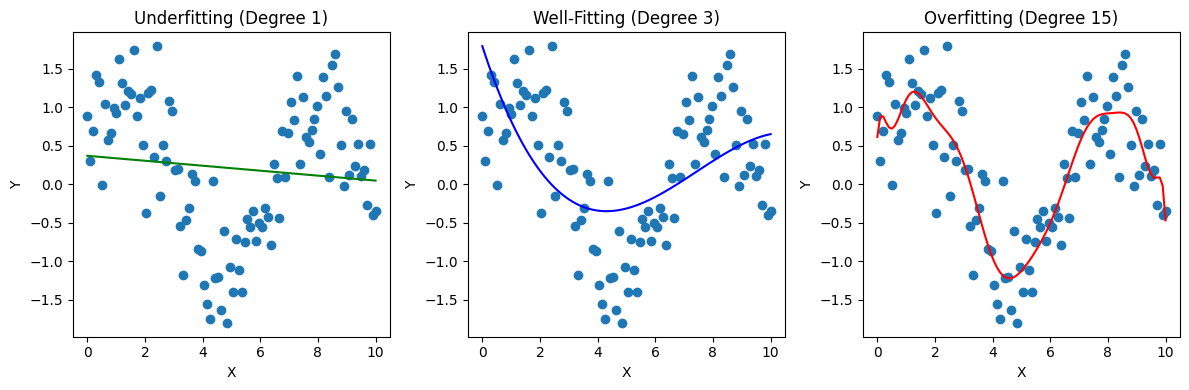

In [11]:
# Plotting the underfitting model
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(x, y, label='Data')
plt.plot(x, underfit_model(x), label='Underfit Model (Degree 1)', color='green') 
#plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Underfitting (Degree 1)')

# Plotting the well-fitting model
plt.subplot(1, 3, 2)
plt.scatter(x, y, label='Data')
plt.plot(x, well_fit_model(x), label='Well-Fit Model (Degree 3)', color='blue') 
#plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Well-Fitting (Degree 3)')

# Plotting the overfitting model
plt.subplot(1, 3, 3)
plt.scatter(x, y, label='Data')
plt.plot(x, overfit_model(x), label='Overfit Model (Degree 15)', color='red') 
#plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Overfitting (Degree 15)')

plt.tight_layout()
plt.show()

## Preventing Overfitting and Underfitting

First and foremost, in order to spot over or under fitting, we need to have a some new data to test our trained model with. 

We can **simulate** the scenario of having new data, by simply splitting our dataset into what is known as a training set and a test set. We will use the training set to train our model, and once this is trained, we can test the model using the test set, which the model has never seen before. 

Looking at the metrics of the models on the training set and the test will help us decide if we are over-fitting under-fitting.

Later we will see examples of using training sets and test sets.

---

# Sci-Kit Learn

Now we will move on to the Sci-Kit Learn machine learning library.

If you are doing Machine Learning with Python, you will most likely eventually end up using Sci-Kit Learn for many of your machine learning tasks. 

Sci-Kit Learn is a library of machine learning tools, algorithms, and utilities, that covers classification, regression, and clustering (unsupervised learning). 

Because there are many algorithms that are implemented in SciKit Learn, we will cover the general usage of the package, and show a few examples of some of the algorimths. Most algorithms follow the same API conventions, so if you know how to train a few of the algorithms using Sci-Kit Learn, you will probably quite easily be able to use all of them without too much difficulty.

If we just take a look at the amount of algorithms covered by Sci-Kit Learn it is overwhleming:

<https://scikit-learn.org/stable/user_guide.html>

Covering all these different methods would be overwhelming and we would not have enough time to ever cover a fraction of them here. Instead I will talk about how use SciKit Learn **in general**. 

Most algorithms use a very similar API. In other words, if you have your data prepared in a way that one of these algorithms will accept it, then you can probably apply quite a few algorithms very easily. 

## Datasets

Before we can train any algorithms, we will need some data. SciKit Learn's `datasets` module contains a number of sample datasets that can be used to test your code, or to benchmark an approach and so on. 

Benchmarking datasets are useful as you can compare your results of a new approach that you have undertaken, as you can directly compare metrics with the state of the art, etc. 

Often, benchmarking datasets have pre-defined training and test sets, so that you can compare your approach's evaluation metrics with the metrics from the identical test set of previous state-of-the-art approaches. 

So let's now have a look at the datasets API of SciKit-Learn.

Perhaps not surprisngly, the `sklearn.datasets` package contains the relevant functions and so on.

There are 4 main categories of the `sklearn.datasets` package:

1. Toy datasets
2. Real-world datasets
3. Data generators

Some of these are dataset **loaders**, that is the data is included in the software package, and can be immediately loaded into memory. Others are dataset **fetchers**, that is to say that the first time you load such a dataset, the dataset is downloaded from the internet and saved to a directory on your computer. This directory is checked every time you fetch such a dataset, and if it has already been downloaded in the past, it will use the previously downloaded copy. This directory is normally something like `/home/username/.sklearn/datasets` on a Linux system, and will be different under Windows.

Both **fetchers** and **loaders** all return a dictionary-like object with *at least* the following attributes:

- A `n_samples` $\times$ `n_features` matrix under the key `data`
- An array of length `n_samples` containing the targets, under the key `target`

Most of the datasets allow you to specify that you only wish to receive the data and no additional information (most datasets contain information about the class names, and so on), and this can be specfied using `return_X_y=True` when loading the dataset. Most datasets can also be returned as a Pandas DataFrame, you can specify the `as_frame=True` parameter.

On the other hand, the **generator** functions create datasets according to your requirements. This is very useful to test a method or pipeline you have developed. For example, you can create a dataset which is gauranteed to be linerally seperable. If your approach does not work on such a dataset, you know you have done something very wrong! 

The **generator** functions all return a **tuple** of the form `(X, y)`:

- where `X` is a `n_samples` $\times$ `n_features` matrix, and
- where `y` is an array of length `n_samples`

In this section we will use a few of this functionality.

## Diabetes Dataset

The diabetes dataset is a built-in dataset, and is loaded as follows:

In [12]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

The `diabetes` object that is retruned is a dictionary-like object, we can take a look at it here:

In [13]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

As you can see, such built-in datasets contain a bunch of different this, as well as the `data` and a `target` key/attributes that we spoke about earlier. They can be accessed using a key like a dictionary, such as `diabetes['target']`, or using the `.` notation:

In [14]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

As said previously, `target` is an array of length `n_samples`, and data is an `n_samples` $\times$ `n_features` matrix:

In [15]:
print(f"Targets shape: {diabetes.target.shape}\nData shape: {diabetes.data.shape}")

Targets shape: (442,)
Data shape: (442, 10)


If we want to use Pandas, we can request a DataFrame:

In [16]:
diabetes_df = datasets.load_diabetes(as_frame=True)

And preview it using the `head()` or `tail()` function:

In [17]:
diabetes_df.data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Of course, having a pandas DataFrame instead of a Numpy 2D array, does make some things a bit easier, such as being able to select columns/features by their column name:

In [18]:
diabetes_df.data.bmi

0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
         ...   
437    0.019662
438   -0.015906
439   -0.015906
440    0.039062
441   -0.073030
Name: bmi, Length: 442, dtype: float64

Other helper functions include `describe()` which prints some statistics about each feature in the DataFrame:

In [19]:
diabetes_df.data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


If you are not interesting in all this extra information, you can specify `return_X_y=True`:

In [20]:
X, y = datasets.load_diabetes(return_X_y=True)

In [21]:
X.shape

(442, 10)

In [22]:
y.shape

(442,)

This returns only the `X` and `y` data structures and nothing else, by default as Numpy arrays. You can also combine this with the `as_frame=True` to get `X` and `y` as DataFrames:

In [23]:
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## OpenML

Another way to access data is via OpenML, and here we will take a look at SciKit-Learn's API for interfacing with <http://openml.org>.

Let's take a look at the website now, and search for something like 'mice'.

The website <http://openml.org> gives you access to over 5,000 datasets, and SciKit Learn allows you to just download them directly, in a format that SciKit expects. 

To do this we use the `fetch_openml()` function:

In [24]:
from sklearn.datasets import fetch_openml

mice = fetch_openml(name='miceprotein', version=4)

In [25]:
mice

{'data':       DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
 0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
 1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
 2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
 3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
 4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
 ...        ...       ...       ...       ...       ...       ...       ...   
 1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
 1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
 1077  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
 1078  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
 1079  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   
 
       pCAMKII_N   pCREB_N    pELK_N  ... 

---

As per the examples above, we have `data` and `target`:

In [26]:
mice.data.shape

(1080, 77)

In [27]:
mice.target.shape

(1080,)

Datasets also generaly have a `details` attribute:

In [28]:
mice.details

{'id': '40966',
 'name': 'MiceProtein',
 'version': '4',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2017-11-08T16:00:15',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/17928620/MiceProtein.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0004/40966/dataset_40966.pq',
 'file_id': '17928620',
 'default_target_attribute': 'class',
 'row_id_attribute': 'MouseID',
 'ignore_attribute': ['Genotype', 'Treatment', 'Behavior'],
 'tag': ['Economics', 'OpenML-CC18', 'study_135', 'study_98', 'study_99'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0004/40966/dataset_40966.pq',
 'status': 'active',
 'processing_date': '2018-10-04 00:49:58',
 'md5_checksum': '3c479a6885bfa0438971388283a1ce32'}

Gathering data can be very tedious. Especially if data is provided in obscure formats, or propritery formats that require something like MATLAB or SPSS. 

Using the OpenML interface can be very convenient.

# Generating Data

Sometimes, however, you want a dataset with very specific properties to test a machine learning approach that you are trying. Here is where you might use a data generator instead.

Generators are part of the `sklearn.datasets` package, generally preceded with the word `make_...`. For example `datasets.make_classification()`. 

We can load this as follows:

In [29]:
from sklearn.datasets import make_classification

We can take a look at the documentation:

In [30]:
make_classification?

Signature:
make_classification(
    n_samples=100,
    n_features=20,
    *,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
)
Docstring:
Generate a random n-class classification problem.

This initially creates clusters of points normally distributed (std=1)
about vertices of an ``n_informative``-dimensional hypercube with sides of
length ``2*class_sep`` and assigns an equal number of clusters to each
class. It introduces interdependence between these features and adds
various types of further noise to the data.

Without shuffling, ``X`` horizontally stacks features in the following
order: the primary ``n_informative`` features, followed by ``n_redundant``
linear combinations of the informative features, followed by ``n_repeated``
duplicates, drawn randomly with replacement from the infor

---

Basically, `make_classification` creates a random $n$-class classification problem. 

If we generate a very simple dataset, we can visualise this easily:

In [31]:
X, y = make_classification(random_state=0)

print(X.shape)
print(y.shape)

(100, 20)
(100,)


As can be seen, `make_classification()` returns a tuple containing your data in `X` and your targets in `y`.

Let's now plot this simple dataset:

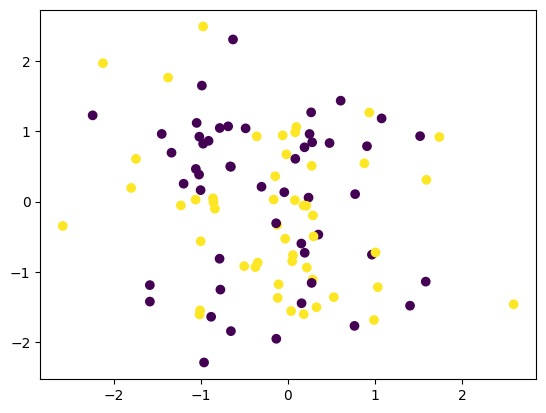

In [32]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y)

Remember from earlier that `X[:,0]` returns all rows from column 0 and that `X[:,1]` returns all rows from column 1. We use `c=y` to define the colours of the classes, and colour the points on the plot.

If we look at this data, it doesn't look very linearly seperable. We can try to fit a linear model anyway and see what happens:

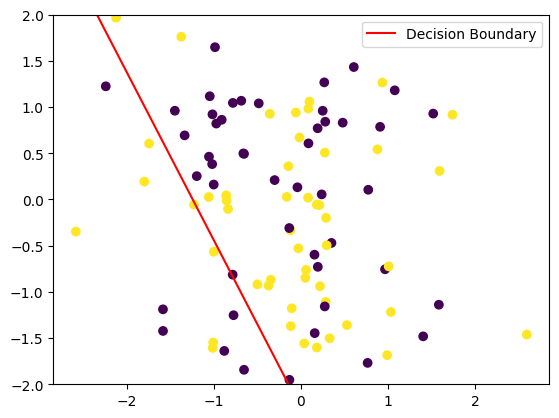

In [33]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Getting the coefficients of the logistic regression to plot the decision boundary
coef = model.coef_[0]
intercept = model.intercept_

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)

# Calculating the line points
x_values = np.array([min(X[:, 0]), max(X[:, 0])])
y_values = -(x_values * coef[0] + intercept) / coef[1]

# Plotting the decision boundary
plt.ylim(-2, 2)
plt.plot(x_values, y_values, label="Decision Boundary", color='red')
plt.legend();

So this fit is bascially useless. A Linear classifier is not going to work on this data.

But, as we said before, we can fine tune the generated data to be exactly how we want it:

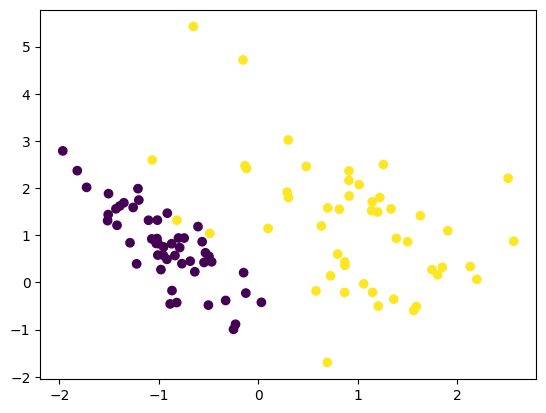

In [34]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=2, n_clusters_per_class=1)
plt.scatter(X[:,0], X[:,1], c=y);

This looks much better and should be linearly seperable. 

Let's now fit a Logistic Regression classifier to it:

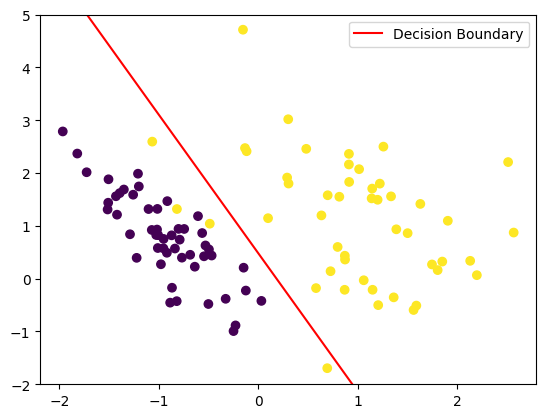

In [35]:
model = LogisticRegression()
model.fit(X, y)
coef = model.coef_[0]
intercept = model.intercept_

plt.scatter(X[:, 0], X[:, 1], c=y)

x_values = np.array([min(X[:, 0]), max(X[:, 0])])
y_values = -(x_values * coef[0] + intercept) / coef[1]

plt.ylim(-2, 5)
plt.plot(x_values, y_values, label="Decision Boundary", color='red')
plt.legend();

That is much better. As you can see, you can create a dataset to match your exact needs, and thereby create data that should be, for example, linearly classifiable. 

You can of course also make data for regression tasks, unsupervised tasks, inlcude noise, and so on.

---
# Model Persistence 

Once you have a trained model, often you will want to deploy this model or use it some upstream task. 

For example, tomorrow we will create a web-applicationm with a front end to a model we will train. We will see how we can integrate a trained model in to web application, with a model you have saved for use later. 

Here we will learm how to save a trained model, using Sci-Kit Learn.

In order to save models, SciKit Learn uses Python's pickle format. This is a serialised binary format. This means that, for example, you can serialise any Python object and save it to disk. Therefore to save a trained model, we just use default Python tools, which SciKit-Learn uses internally anyway. 

First, let's load up the Iris dataset, and train a support vector classifier:

In [36]:
from sklearn import svm
from sklearn import datasets

model = svm.SVC()
X, y = datasets.load_iris(return_X_y=True)
model.fit(X, y)

SVC()

This is now trained.

To save this model to disk, we use Python's built in binary serialiser, called Pickle.

In [37]:
import pickle

pickle.dump(model, open('model.pickle', 'wb'))  # wb = write, binary

The model has now been saved to the file `model.pickle`.

This `model.pickle` can now be transferred elsewhere, sent to another party, stored for later use, or just opened in some other application's workflow. We will see this tomorrow when we create our web application.

To demonstrate this, we can read the file from disk as a new 

In [38]:
model_from_file = pickle.load(open('model.pickle', 'rb'))

Once opened, we can immediately use it to make some predictions on some data:

In [39]:
model_from_file.predict(X[0:5])

array([0, 0, 0, 0, 0])

---
# Train and Test Split

The `model_selection` module contains a lot of helper functions, such as `train_test_split()` which is useful for creating training and testing datasets from our full data set.

It works as follows:

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
```

This will shuffle your data (and shuffle `X` and `y` in unison, which is obviously very important) and create your training and testing splits, as indicated by the varible names above. The `test_size` parameter defines the ratio of training to testing data.

We will see a live example of `train_test_split()` being used later.

We will also discuss further training/test split strategies at the end of this seminar also, including a method known as cross validation.

For now, let's just use the `train_test_split()` to create our datasets and discuss this in more detail later.

---

# Training

Now that we have no issue getting and generating data, we will discuss how to use Sci-Kit Learn for trainind models! 

Sci-Kit Learn is a comprehensive package, and contains many dozens of algorithms for training models. 

As we said previously, we mainly discuss supervised learning in this course, however the API used for training models in Sci-Kit Learn is basically the same for most of the algorithms.

Because there are so many algorithms, you might wonder, how do I even choose an algorithm for my particular task. You may, as a very rough guide, take a look at a chart such as the following:

![Sci-Kit Learn Flowchart](./img/scikit-flowchart.png)

This chart is actually interactive on the Sci-Kit Learn website, and clicking on each of the nodes brings you to the documentation for each of the particular algorithms. See the 'cheat sheet' here: <https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html> 

Because the focus of this course is not really about the algorithms per se, we will discuss the API that Sci-Kit Learn uses for training algorithms in general. 

These will differ from algorithm type to type, so for example clustering algorithms are unsupervised, and therefore do not accept a label parameter. These differences are clear from the documentation.

As a first step, let's take classification as an example so that we can learn about the general look and feel of the API. In this case will take a look at the Suport Vector Machine classifier. 

Explaining how SVMs work is out of the scope of this seminar, but what we can say is that it is very widely used algorithm that performs well on a variety of tasks. It can be used for both linear and non-linear data. It can be used for both classification and regression tasks. And it can be used for both binary and multi-class classification.

The general procedure for training any algorithm in SciKit Learn is to initialise an object of the algorithm in question, which will contain all the parameters that are specific to that algorithm.

First we will import it:

In [40]:
# Because there are various types of Support Vector Machine, 
# they are contained within their own module. We choose the Support Vector Classifier
from sklearn.svm import SVC

The standard procedure is to create an object of the type of algorithm you want to train, and this will contain all the algorithm specific parameters.

If we use `Shift` + `Tab`, we can see the parameters for that particular model.

In [41]:
model = SVC(kernel='linear')

Now that we have our `model` object we can pass it some data to learn from. At this point, the `model` object could be from any number of different classifiers implemented in Sci-Kit Learn.

In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

We saw from the examples above, that we can simply say `return_X_y=True` to get only the data, as we are not interested in the description of the data or anything else.

In [43]:
X, y = load_iris(return_X_y=True)

And, in order to test the model, we split our data into training data and testing data, as we briefly mentioned previously:

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Now that we have our data organised, we want to actually train our model. 

All SciKit-Learn algorithms contain a `fit()` function, which normally accepts the same parameters regardless of the underlying model. 

The `fit()` function, for supervised methods at least, requires your training data and their corresponding labels:

In [45]:
model.fit(X_train, y_train)

SVC(kernel='linear')

Now that the model has been trained, we can use the `predict()` function. 

This, again, is common to basically all of the algorithms that are contained in SciKit-Learn.

Normally, you will be passing the test data to the predict function:

In [46]:
y_pred = model.predict(X_test)

It is convention to store predictions in an array called `y_pred` but of course you can all this anything you want.

Two useful utilities are the `accuracy_score()` and `classification_report()` functions that you can use for getting the metrics for any other algorithm (in fact, these functions do not even assume you are even using a SciKit-Learn model at all).

Let's use these to print these metrics:

In [47]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['setosa', 'versicolor', 'virginica'])

print(accuracy)
print(class_report)

0.9473684210526315
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.94      0.94      0.94        17
   virginica       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



We will discuss the classification report again later in more detail.

To demonstrate that we can apply the same exact code to several classifiers, we will define a function that accepts some data, and also a generic `model`. We will then pass several different SciKit Learn models to this function, and they will all work. 

Let's define the function:

In [48]:
def classifiers(X_train, y_train, X_test, y_test, model):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=['setosa', 'versicolor', 'virginica'])

    print(" Results ".center(80, "-"))
    print(f"Model: {model.__class__}")
    print(f"Accuracy: {accuracy}")
    print("".center(80, "-"), "\n")

Now we will define 3 different classification algorithms. 

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

random_forest = RandomForestClassifier(n_estimators=100)
svc = SVC(C=1.0, kernel='linear')
log_reg = LogisticRegression(penalty='l2')

Notice that here we demonstrate that each algorithm does have its own parameters during initialisation. These differ between all algorithms.

In the case of the random forest, we are saying we wish to have 100 trees in our forest. For the support vector machine, we say we want `C` to be 1.0, and that the kernel is linear. The `C` parameter adjusts the separation plane. The `kernel` parameter adjusts the type of support vector classifier you want to train. For the Logistic Regression model, we are saying we wish to use the L2 regularisation, which is a type of penalty to help prevent overfitting.

We can now call our function `classifiers()` above with our data and each of the three models:

In [50]:
models = [random_forest, svc, log_reg]

for model in models:
    classifiers(X_train, y_train, X_test, y_test, model)

----------------------------------- Results ------------------------------------
Model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy: 0.8947368421052632
-------------------------------------------------------------------------------- 

----------------------------------- Results ------------------------------------
Model: <class 'sklearn.svm._classes.SVC'>
Accuracy: 0.9473684210526315
-------------------------------------------------------------------------------- 

----------------------------------- Results ------------------------------------
Model: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy: 0.9210526315789473
-------------------------------------------------------------------------------- 



So, regardless of the model we sent to the `classifiers()` function, we were able to call the same functions on those models, such as `fit()`, with the same parameters, and they all worked and returned data in the exact same way.

As we saw, the differences between the models, are normally only defined during the inialisation. 

## Exercise 1

Find a model that you can apply the same data to, using the same API. You might want to check the documentation for linear models, for example (https://scikit-learn.org/stable/modules/linear_model.html)

Print the accuracy and classification report on a **test set** that you have created. You can use the Iris dataset.

In [51]:
# your code here

# Data Preprocessing

Let's briefly discuss the topics of data preprocessing.

What is data preprocessing? It is merely getting a dataset ready to be inputted in to a machine learning algorithm for training. Exaclty what you need to do often actually depends on the type of algorithm you are training. For example, one simple type of data cleaning is handling missing values. Some algorithms cannot handle missing data for example, while others can. Therefore, this step would depend on the algorithm you want to train.

Other operations include scaling your data, using feature scaling. Sci-Kit Learn provides numerous helper functions for such tasks, as we will see here.

## Cleaning Data

Before we scale or normalise the data, we might want to clean it first. Threfore let's clean a very simple dataset right now to see some methods that you might use.

Note that it is often much easier to use Pandas for such tasks. You can always convert your dataset to Numpy if required later.

Let's work with a dataset known as the Cleveland Heart Disease Dataset, a well known dataset used for benchmarking.

Let's load the dataset and then preview it:

In [52]:
import pandas as pd

heart_disease = pd.read_csv('./data/cleve.mod.mdb.csv')
heart_disease.head()

,Age,Gender,Chest Pain Type,Resting Blood Pres,Cholesterol,Blood Sugar Less 120,Resting ECG,Max Heart Rate,Exercise Induced Angina,Old Peak,Slope,Number of Vessels Coloured,Thalassemia,Status,Status Type
0,63.0,M,angina,145.0,233.0,True,hyp,150.0,False,2.3,down,0.0,fix,healthy,H
1,67.0,M,asympt,160.0,286.0,False,hyp,108.0,True,1.5,flat,3.0,norm,sick,S2
2,67.0,M,asympt,120.0,229.0,False,hyp,129.0,True,2.6,flat,2.0,rev,sick,S1
3,37.0,M,notang,130.0,250.0,False,norm,187.0,False,3.5,down,0.0,norm,healthy,H
4,41.0,F,abnang,130.0,204.0,False,hyp,172.0,False,1.4,up,0.0,norm,healthy,H


We won't go over each feature, however the **Status** column contains the values of 'healthy' and 'sick' and relates to **presence** or **absence** of heart disease.

Also, the dataset consists of 303 patients, with 14 features and the target ("Status"), which we can see here:

In [53]:
heart_disease.shape

(303, 15)

First step in our data cleansing process is that we will drop the "Status Type" column, as it does not tell us anything about the patient (it relates to how the data was collected and is therefore useless for the actual classification of the patient):

In [54]:
heart_disease.drop('Status Type', axis=1, inplace=True)

By saying `inplace=True`, we modify the heart_disease DataFrame directly, otherwise Pandas would return a new DataFrame with the data removed.

Therefore, we should now see one less column/feature:

In [55]:
heart_disease.shape

(303, 14)

Which we do.

Also, we decide that the terms healthy/sick is not very professional, and replace these values with absent and present:

In [56]:
heart_disease['Status'] = heart_disease['Status'].map({'healthy': 'absent', 'sick': 'present'})

Preview our data once again:

In [57]:
heart_disease.head()

,Age,Gender,Chest Pain Type,Resting Blood Pres,Cholesterol,Blood Sugar Less 120,Resting ECG,Max Heart Rate,Exercise Induced Angina,Old Peak,Slope,Number of Vessels Coloured,Thalassemia,Status
0,63.0,M,angina,145.0,233.0,True,hyp,150.0,False,2.3,down,0.0,fix,absent
1,67.0,M,asympt,160.0,286.0,False,hyp,108.0,True,1.5,flat,3.0,norm,present
2,67.0,M,asympt,120.0,229.0,False,hyp,129.0,True,2.6,flat,2.0,rev,present
3,37.0,M,notang,130.0,250.0,False,norm,187.0,False,3.5,down,0.0,norm,absent
4,41.0,F,abnang,130.0,204.0,False,hyp,172.0,False,1.4,up,0.0,norm,absent


Let's say we notice that some of the rows contain missing values, which in this dataset are marked with a `?`. We can find all rows that contain missing values quite easily using `isin()` and searching for the `?` string:

In [58]:
heart_disease[heart_disease.isin(['?']).any(axis=1)]

,Age,Gender,Chest Pain Type,Resting Blood Pres,Cholesterol,Blood Sugar Less 120,Resting ECG,Max Heart Rate,Exercise Induced Angina,Old Peak,Slope,Number of Vessels Coloured,Thalassemia,Status
82,53.0,F,notang,128.0,216.0,False,hyp,115.0,False,0.0,up,0.0,?,absent
143,52.0,M,notang,138.0,223.0,False,norm,169.0,False,0.0,up,?,norm,absent
157,38.0,M,notang,138.0,175.0,False,norm,173.0,False,0.0,up,?,norm,absent
165,43.0,M,asympt,132.0,247.0,True,hyp,143.0,True,0.1,flat,?,rev,present
198,52.0,M,asympt,128.0,204.0,True,norm,156.0,True,1.0,flat,0.0,?,present
250,58.0,M,abnang,125.0,220.0,False,norm,144.0,False,0.4,flat,?,rev,absent
262,38.0,M,notang,138.0,175.0,False,norm,173.0,False,0.0,up,?,norm,absent


The `isin()` function returns a list of booleans indicating if `?` is present in any of the values in each row, `True` when present, `False` when not. We can use `any()` to check if any of the Booleans in the list are `True`. 

**Note**: in this dataset, missing values are indicated with a `?` which is somewhat non-standard. Often missing values are simply `null` or `NaN`, and if this is the case, you can just use `dropna()`, which we see below.

As we can see, we have 7 rows with missing values. There are many techniques for handling missing values (such as using the mean or median value of the column), but we are going to simply delete these rows. We have a total of 303 patients, so removing 7 of them should not be an issue.

Also note that some algorithms can handle missing data! Decision trees are one such algorithm.

Let's drop them:

In [59]:
heart_disease =  heart_disease.replace('?', np.nan).dropna()
print(str(len(heart_disease)) + " rows remaining.")

296 rows remaining.


What we have done here is actually replace occurances of `?` with `np.nan` (not a number) and then used the `dropna()` to drop any NaNs. 

You will also notice, that several of the columns in the dataset contain categorical values in the form of strings, such as gender:

In [60]:
print(heart_disease.Gender.unique())

['M' 'F']


For input in to a training algorithm, we cannot use such categorical values. We need to replace these with numerical values.

We can replace values quite easily, as follows:

In [61]:
heart_disease.Gender = heart_disease.Gender.replace('M', 0)
heart_disease.Gender = heart_disease.Gender.replace('F', 1)

/tmp/ipykernel_1930070/3404808249.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_disease.Gender = heart_disease.Gender.replace('F', 1)


Here we use Pandas' `replace()` function to do this.

**Note**: if you see a warning when we run this function, we can safely ignore it for now - it is merely informing us about a future change to the functionality of the `replace()` function.
 
We can look at our data again:

In [62]:
heart_disease.head()

,Age,Gender,Chest Pain Type,Resting Blood Pres,Cholesterol,Blood Sugar Less 120,Resting ECG,Max Heart Rate,Exercise Induced Angina,Old Peak,Slope,Number of Vessels Coloured,Thalassemia,Status
0,63.0,0,angina,145.0,233.0,True,hyp,150.0,False,2.3,down,0.0,fix,absent
1,67.0,0,asympt,160.0,286.0,False,hyp,108.0,True,1.5,flat,3.0,norm,present
2,67.0,0,asympt,120.0,229.0,False,hyp,129.0,True,2.6,flat,2.0,rev,present
3,37.0,0,notang,130.0,250.0,False,norm,187.0,False,3.5,down,0.0,norm,absent
4,41.0,1,abnang,130.0,204.0,False,hyp,172.0,False,1.4,up,0.0,norm,absent


The gender field only had 'M' and 'F' values, so we could just replace these manually using two lines of code. However, if a field was to contain many different values, you can loop over them and replace them. 

We will do this now to demonstrate how this works.

Again we use the `unique()` function:

In [63]:
cpt = heart_disease['Chest Pain Type'].unique()
print(cpt)

['angina' 'asympt' 'notang' 'abnang']


We now have a list containing the unique values for this field. 

We can replace them with numerical values as follows:

In [64]:
for index, value in enumerate(cpt):
    heart_disease['Chest Pain Type'] = heart_disease['Chest Pain Type'].replace(value, index)

/tmp/ipykernel_1930070/326165071.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_disease['Chest Pain Type'] = heart_disease['Chest Pain Type'].replace(value, index)


And once again preview our data:

In [65]:
heart_disease.head()

,Age,Gender,Chest Pain Type,Resting Blood Pres,Cholesterol,Blood Sugar Less 120,Resting ECG,Max Heart Rate,Exercise Induced Angina,Old Peak,Slope,Number of Vessels Coloured,Thalassemia,Status
0,63.0,0,0,145.0,233.0,True,hyp,150.0,False,2.3,down,0.0,fix,absent
1,67.0,0,1,160.0,286.0,False,hyp,108.0,True,1.5,flat,3.0,norm,present
2,67.0,0,1,120.0,229.0,False,hyp,129.0,True,2.6,flat,2.0,rev,present
3,37.0,0,2,130.0,250.0,False,norm,187.0,False,3.5,down,0.0,norm,absent
4,41.0,1,3,130.0,204.0,False,hyp,172.0,False,1.4,up,0.0,norm,absent


However, this method is quite manual and not very clean, and we need to ensure we keep our `cpt` list otherwise we will not be able to trace the numerical values back to the categories. A better approach is to use one of SciKit-Learn's encoders.

So instead, for the remaining categorial features, let's use SciKit-Learn's `OridnalEncoder` to do this.

For demonstratin purposes, let's first do this to 'Resting ECG' column to see how it works.

Let's import `OrdinalEncoder` and then create a new object called `encoder`, telling it to transform the 'Resting ECG' feature:

In [66]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder().set_output(transform="pandas")

# Encode the Resting ECG column
resting_ecg_encoded = encoder.fit_transform(heart_disease[['Resting ECG']])

This is now done, and we can take a look at our encoded column:

In [67]:
resting_ecg_encoded.head()

,Resting ECG
0,1.0
1,1.0
2,1.0
3,2.0
4,1.0


As you can see, the categorical values have been given numerical values for the 'Resting ECG' column.

In this case, we did this just on one column, to demonstrate how it works - but we can apply the encoder to multiple columns at the same time and perform this conversion with just a couple of lines of code. So let's do this now.

First, let's create a new encoder, and then tell it the categorical featurres that we wish to encode as numerical values:

In [68]:
encoder = OrdinalEncoder().set_output(transform="pandas")

encoded = encoder.fit_transform(heart_disease[['Resting ECG', 'Slope', 'Thalassemia', 'Status']])

That's it, in just a few lines of code we have converted 4 columns in to numerical features!

We can take a look at the columns now:

In [69]:
encoded

,Resting ECG,Slope,Thalassemia,Status
0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,2.0,1.0
3,2.0,0.0,1.0,0.0
4,1.0,2.0,1.0,0.0
...,...,...,...,...
298,2.0,2.0,1.0,0.0
299,2.0,2.0,2.0,0.0
300,1.0,2.0,1.0,1.0
301,1.0,2.0,1.0,0.0


Now that we see they look good, we can replace our columns with the encoded columns in one line:

In [70]:
heart_disease[['Resting ECG', 'Slope', 'Thalassemia', 'Status']] = encoded

Let's preview our data once again:

In [71]:
heart_disease.head()

,Age,Gender,Chest Pain Type,Resting Blood Pres,Cholesterol,Blood Sugar Less 120,Resting ECG,Max Heart Rate,Exercise Induced Angina,Old Peak,Slope,Number of Vessels Coloured,Thalassemia,Status
0,63.0,0,0,145.0,233.0,True,1.0,150.0,False,2.3,0.0,0.0,0.0,0.0
1,67.0,0,1,160.0,286.0,False,1.0,108.0,True,1.5,1.0,3.0,1.0,1.0
2,67.0,0,1,120.0,229.0,False,1.0,129.0,True,2.6,1.0,2.0,2.0,1.0
3,37.0,0,2,130.0,250.0,False,2.0,187.0,False,3.5,0.0,0.0,1.0,0.0
4,41.0,1,3,130.0,204.0,False,1.0,172.0,False,1.4,2.0,0.0,1.0,0.0


Now all our data is numerical or Boolean (which can be handled as numerical data by Sci-Kit Learn, as they simply represent 0 and 1 anyway).

Note, a very useful feature is that the `encoder` object contains our original categories, which we can reference later if we needed to know what 1 means in the 'Status' field, for example:

In [72]:
encoder.categories_

[array(['abn', 'hyp', 'norm'], dtype=object),
 array(['down', 'flat', 'up'], dtype=object),
 array(['fix', 'norm', 'rev'], dtype=object),
 array(['absent', 'present'], dtype=object)]

We can now train a model using the data.

In this case we will train a decision tree so that we can visualise our classifier.

First we create a target vector `y` containing our labels, and we then drop this from the `heart_disease` DataFrame:

In [73]:
y = np.array(heart_disease["Status"])
heart_disease.drop('Status', inplace=True, axis=1)

And because SciKit Learn can handle DataFrames, we do not need to convert the data to Numpy or anything similar before training:

In [74]:
from sklearn.tree import DecisionTreeClassifier, export_text

model = DecisionTreeClassifier()
model.fit(heart_disease, y)

DecisionTreeClassifier()

Now that the tree has been trained, we can visualise its learned decisions/rules. 

Notice below how we use the `encoder` object to get the the original class names:

In [75]:
print(export_text(model, feature_names=list(heart_disease.columns), class_names=encoder.categories_[-1]))

|--- Thalassemia <= 1.50
|   |--- Number of Vessels Coloured <= 0.50
|   |   |--- Old Peak <= 2.70
|   |   |   |--- Age <= 57.50
|   |   |   |   |--- Max Heart Rate <= 125.50
|   |   |   |   |   |--- Thalassemia <= 0.50
|   |   |   |   |   |   |--- class: present
|   |   |   |   |   |--- Thalassemia >  0.50
|   |   |   |   |   |   |--- class: absent
|   |   |   |   |--- Max Heart Rate >  125.50
|   |   |   |   |   |--- Resting Blood Pres <= 109.00
|   |   |   |   |   |   |--- Cholesterol <= 232.50
|   |   |   |   |   |   |   |--- class: absent
|   |   |   |   |   |   |--- Cholesterol >  232.50
|   |   |   |   |   |   |   |--- Cholesterol <= 255.00
|   |   |   |   |   |   |   |   |--- class: present
|   |   |   |   |   |   |   |--- Cholesterol >  255.00
|   |   |   |   |   |   |   |   |--- class: absent
|   |   |   |   |   |--- Resting Blood Pres >  109.00
|   |   |   |   |   |   |--- class: absent
|   |   |   |--- Age >  57.50
|   |   |   |   |--- Cholesterol <= 235.00
|   |   |   |   

This demonstrated some of the basics of data cleaning. 

**Note**: For some algorithms, an OrdinalEncoder would result in possibly poor results, and a OneHotEncoder would work better. This is not the case for decision trees, however. See <https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html> for more information.

Next we will demonstrate how you can scale features. 

## Scaling and Normalising

Quite a few algorithms will behave non-optimally if the features do not look like standard normally distributed data, e.g. Gaussian distributed with a mean of 0 and a standard deviation of 1.

SciKit Learn has a large number of normalisation and scaling functionality built in to its `sklearn.preprocessing` package. 

Here we will use the `StandardScaler` to demonstrate how to do feature scaling.

First let's import `StandardScaler` and create a `scalar` object:

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")

Using this `scaler` we will now scale one feature, namely the Cholesterol column, to demonstrate its usage:

In [77]:
cholesterol_scaled = scaler.fit_transform(heart_disease[['Cholesterol']])

Now the data has been scaled, we can look at it side by side with the original data:

In [78]:
pd.concat([cholesterol_scaled, heart_disease.Cholesterol], axis=1)

,Cholesterol,Cholesterol
0,-0.272801,233.0
1,0.748607,286.0
2,-0.349888,229.0
3,0.054821,250.0
4,-0.831685,204.0
...,...,...
298,0.151180,255.0
299,-0.773869,207.0
300,-1.891637,149.0
301,0.420986,269.0


We can look at the maximum and minimum values using the Pandas `max()` and `min()` functions:

In [79]:
print(f"Max value: {cholesterol_scaled.max()}")
print(f"Max value: {cholesterol_scaled.min()}")

Max value: Cholesterol    6.106183
dtype: float64
Max value: Cholesterol   -2.33489
dtype: float64


The scaled value of 6.1 looks rather high compared to the minimum value, it might be best to visualise the data instead to get an better understanding of what is going on.

Pandas makes it very easy to plot the distribution for example, using the `plot.hist()` function:

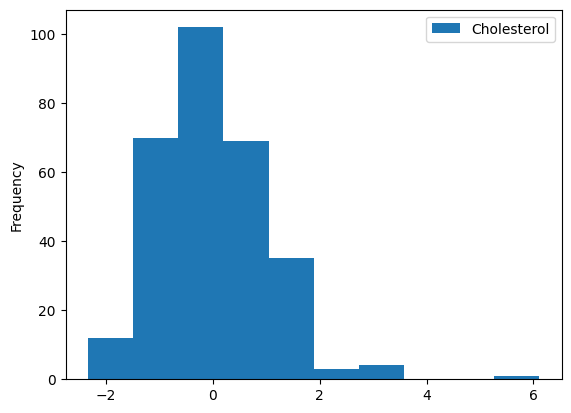

In [80]:
cholesterol_scaled.plot.hist();

Seems we might have an outlier or two which has skewed things somewhat. Maybe a boxplot would tell us more?

Pandas has a a large number of plotting tools, including the ability to generate a boxplot very easily:

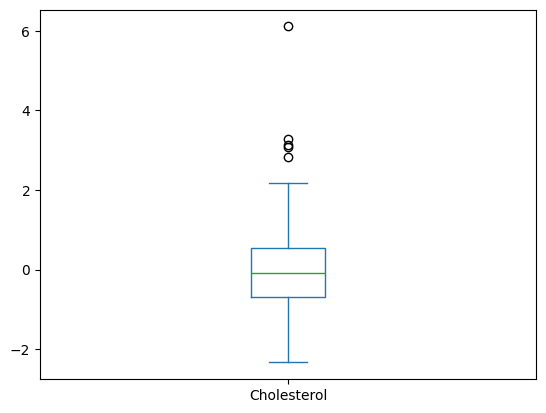

In [81]:
cholesterol_scaled.plot.box();

As a reminder, the green line shows the median value, meaning 50% of the data is above that line and 50% below. The circles show outliers. The blue lines show the upper and lower quartiles.

Out of curiosity, we can use the `nlargest()` method to look at the 5 largest values from the original feature column.

In [82]:
heart_disease.Cholesterol.nlargest(5)

132    564.0
43     417.0
154    409.0
109    407.0
146    394.0
Name: Cholesterol, dtype: float64

It seems that this value of 564 is a truly large outlier! 

### Summary
We have seen how we can scale features quite easily. It is very similar to how the categorical encoder works. 

Once you are used to the SciKit Learn `preprocessing` module, you will see that most scalers, normalisers, and encoders have a very similar API, and that you will be able to transform entire datasets in just a few lines of code. 

**Note** that scaling and normalisation do not take in to account outliers, for that take a look at `QuantileTransformer` or `PowerTransformer`, see <https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html>

**Note also**, that not all algorithms equire scaling. Some, however, absolutely require that all features centre around 0. Check the documentation.  

We have seen some very basics of scaling and normalising, see SciKit-Learn's documentation for more details: <https://scikit-learn.org/stable/modules/preprocessing.html>

## Exercise 2

Adapt the code from above to scale all the columns in the heart disease dataset.

Reload the dataset if needed. 

In [83]:
# your code here

# *k*-Fold Cross Validation

Finally for today, we will discuss cross validation.

One issue with using a single train/test split, is that when you split the data, you may get an 'easy' test set at random. 

Therefore, your model performs well on this test set, but then in a real world setting underperforms.

What is the solution to this? 

We could repeat the experiment several times, with different training / test splits.

If the model performs well across a few different training and testing splits, you can argue that the model is more robust. 

How might you do this? 

We could manually create *n* number of training and test splits, let's say *n*=3, and run the experiment *n*=3 times. Again, if the performance of the model on the test sets are stable, it implies that your training strategy is robust and perhaps you final trained model would generalisable to real world data.

This is fine, but the best way is to systematically split the data in to *k* folds, where each fold is a distinct 80/20 split, for example: and 80/20 split implies *k*=5. Commonly you will see 10-fold cross validation, where you will have 90/10 splits or 5-fold cross validation where you will see 80/20 splits.

![CV](./img/cross-validation.png)

*Source*: <https://www.mltut.com/k-fold-cross-validation-in-machine-learning-how-does-k-fold-work/>

This is known as *k*-Fold Cross Validation.

Note the following:

- Every sample is eventually tested against
- Similarly, you use all your data for training. In a scenario with limited data, this is an advantage.
- In a *k*-fold you wil train *k* models and get *k* metrics

Generally, after performing the experiment *k* times, you would report the results of all *k* models, noting if there is large variance between the the *k* different models.

What are some of the disadvantages of cross validation?

- Time consuming, as you need to train *k* models
- Not possible for very large datasets: for example, for image analysis with very deep networks, training can take 1 week. 10 fold cross validation is not feasible in this scenario

## 5-Fold Cross Validation Example

Here we will perform 10 fold cross validation on the Iris dataset.

To do this we will use Sci-Kit Learn's `KFold()` function. 

In [84]:
from sklearn.model_selection import cross_val_score

model = svm.SVC(kernel='linear', C=1, random_state=42)

X, y = load_iris(return_X_y=True)

scores = cross_val_score(model, X, y, cv=5)

for fold, score in enumerate(scores):
    print(f"Fold: {fold+1}: score: {score}")

Fold: 1: score: 0.9666666666666667
Fold: 2: score: 1.0
Fold: 3: score: 0.9666666666666667
Fold: 4: score: 0.9666666666666667
Fold: 5: score: 1.0


What you see here are the scores for 5 different models. Each trained on a different train/test split.

What you should look out for is that each of the models performs more or less the same, meaning your training strategy is not sensitive to the test data that it gets, meaning it should be generalisable when confronted with real world data.

## End of Day 1

That was our content for Day 1.

Day 2 will focus on Neural Networks and Deep Learning, as well as model deployment.

Topics include:

- Simple neural networks: we will use PyTorch to define a simple neural network and train it
- PyTorch: we will discuss the framework we will use to create neural networks
- Deep learning: we move to deep networks, the basis for all of the recent advancements, such as generative models and GPT models
- Image classification: we will train an image classifier on a number of small tasks
- Image segmentation: we discuss image segmentation in the context of medicine
- Pre-trained models: use networks that have already been trained
- Fine-tuning models: adapt a pre-trained network to your specific task 
- Model deployment and web application development
- Assignment

---